# Importing Data and performing EDA

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

cad = pd.read_excel('Wholesale customers data.xlsx')
cad.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [27]:
cad.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [28]:
cad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


### So far the data has no inconsistencies.

# Scaling the data using MinMax and Stadard Scaler

In [29]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mcad = pd.DataFrame(mm.fit_transform(cad),columns = cad.columns)

In [30]:
mcad.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scad = pd.DataFrame(sc.fit_transform(cad),columns = cad.columns)

In [32]:
scad.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


## Comparing scaled data for MinMax Scaler and Standard Scaler

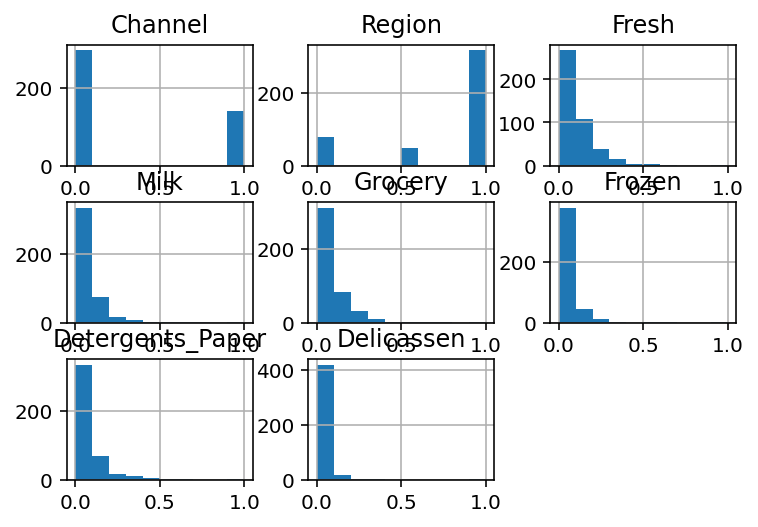

In [33]:
from pandas.plotting import scatter_matrix

mcad.hist()
plt.show()

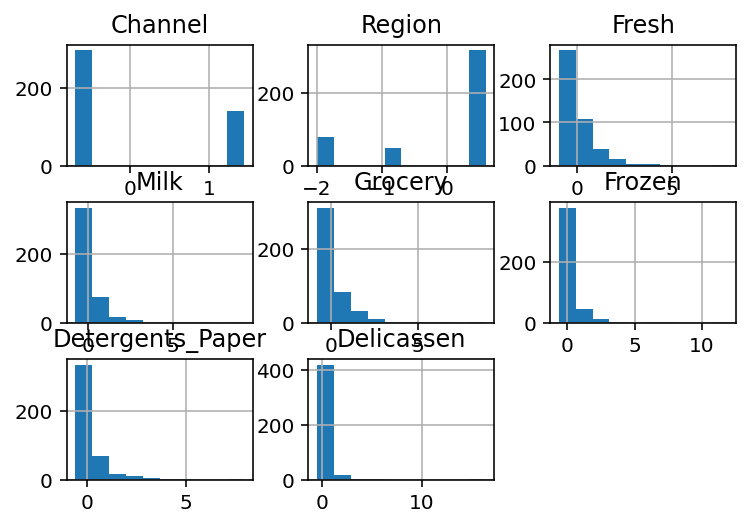

In [34]:
scad.hist()
plt.show()

<AxesSubplot:ylabel='Density'>

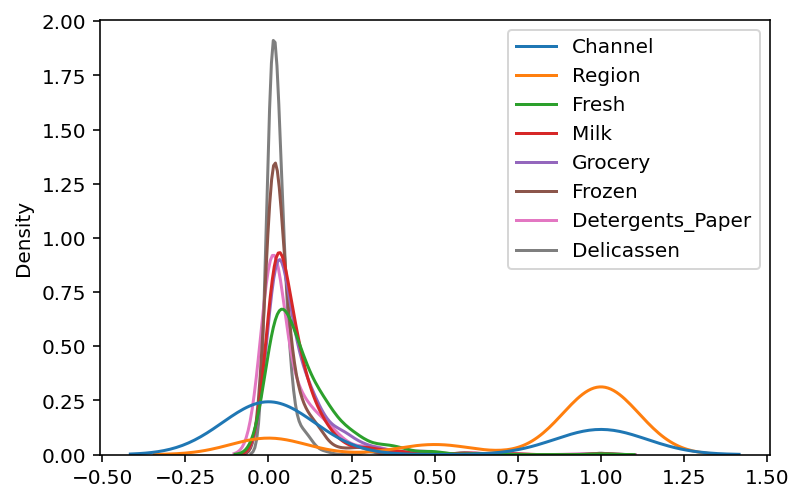

In [35]:
sns.kdeplot(data=mcad)

<AxesSubplot:ylabel='Density'>

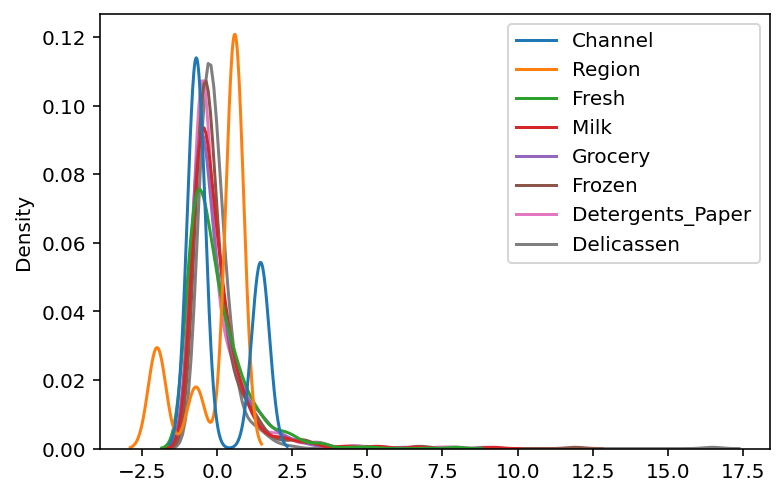

In [36]:
sns.kdeplot(data=scad)

## Selecting Standard Scaler, Because KDE plot of standard scaled data shows smaller bandwidth.

In [37]:
X = scad.drop('Channel', axis=1)
y = scad['Channel']

### Converting y into binary form.

In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y1 = label_encoder.fit_transform(y)

### Finding optimal number of features and plot between Number of features selected vs Cross validation score

Optimal number of features : 1


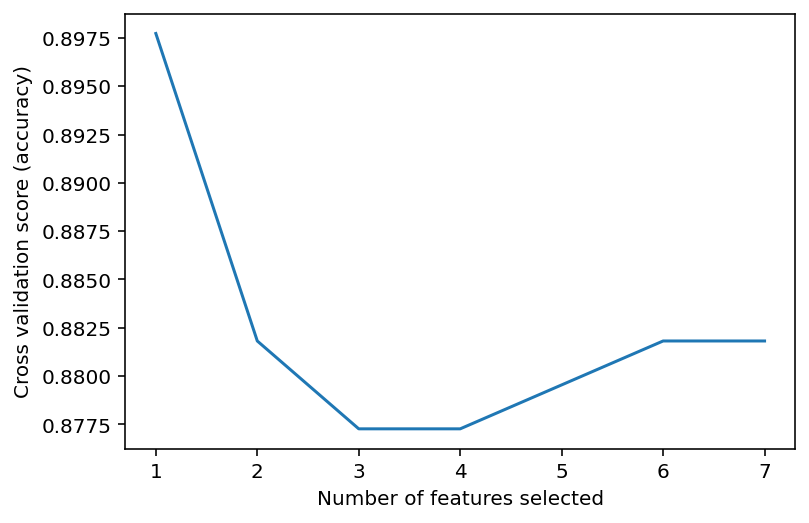

In [39]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

svc = SVC(kernel="linear")

min_features_to_select = 1 
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y1)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()


## Implementing KMeans clusturing

In [40]:
from sklearn.cluster import KMeans

distortions = []
K = range(2,16)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scad)
    distortions.append(kmeanModel.inertia_)

### Performing Elbow Method

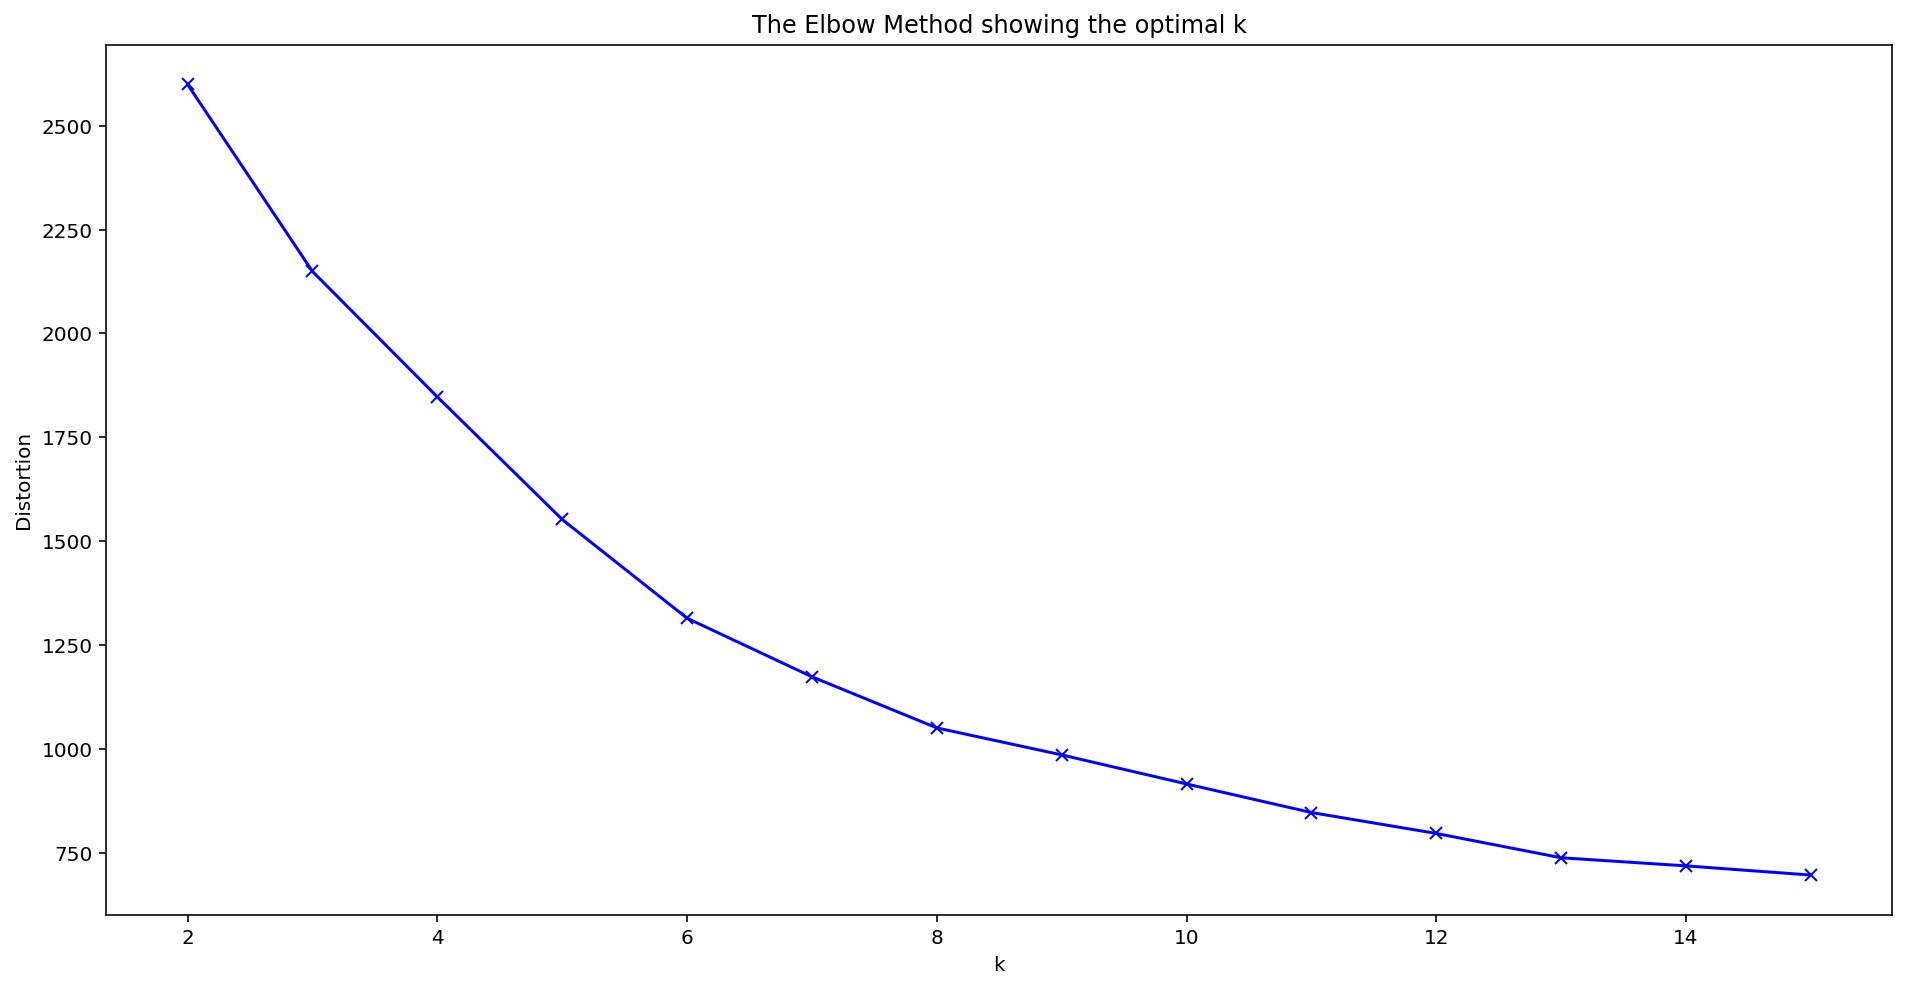

In [41]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Optimum number of clusters will be 6.

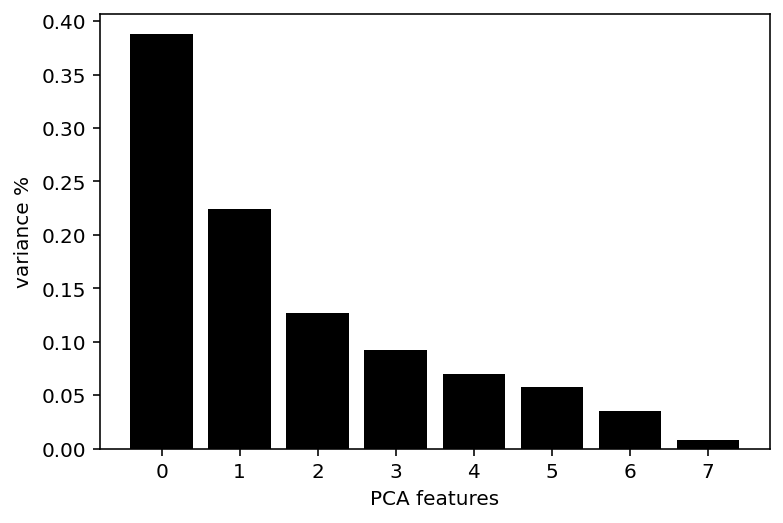

In [42]:
from sklearn.decomposition import PCA

%config InlineBackend.figure_format='retina'

pca = PCA(n_components=n)
principalComponents = pca.fit_transform(scad)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

### Below we can see the varience explained by first 2 components is 0.6112471086263149  and first 4 components is 0.8300178803359717.

In [43]:
for i in range(1,n+1):
    print("The total variance explained by the first {} principle component{} is {}.".format(
            i,
            " " if i == 1 else "s",
            sum(pca.explained_variance_ratio_[0:i])
    ))

The total variance explained by the first 1 principle component  is 0.38750122911592616.
The total variance explained by the first 2 principle components is 0.6112471086263149.
The total variance explained by the first 3 principle components is 0.7377188431493731.
The total variance explained by the first 4 principle components is 0.8300178803359717.
The total variance explained by the first 5 principle components is 0.8995969300447724.
The total variance explained by the first 6 principle components is 0.9570104743979165.
The total variance explained by the first 7 principle components is 0.992151231217934.
The total variance explained by the first 8 principle components is 1.0.


Text(0, 0.5, 'PCA 2')

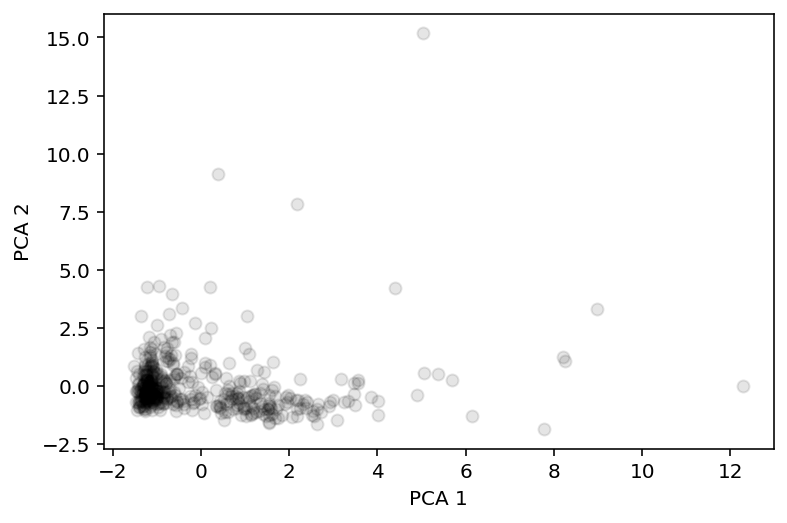

In [44]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

### Here visualizing the data for 2 PCA components we can see 2 clusters forming (i.e. the darker areas), that suggests our data is groupable.

# Implementing XGBoost Classifier with 5 Fold CV

In [45]:
import sys
!{sys.executable} -m pip install xgboost

In [46]:
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X,label=y1)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.3, random_state = 0)

In [48]:
from xgboost import XGBClassifier


params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }         
           
           
xgb_clf = XGBClassifier(**params)

xgb_clf.fit(X_train, y_train)

[15:14:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=1.0, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
y_pred = xgb_clf.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.8788


### Using 5 fold CV

In [51]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

 ## Reporting the performance metrics

In [52]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.904273,0.015496,0.873013,0.006479
1,0.930850,0.025042,0.901821,0.033469
2,0.933181,0.025821,0.912881,0.027724
3,0.945328,0.018717,0.922067,0.035945
4,0.958324,0.005055,0.941464,0.024283


### Here we can see train and test auccuracy metrics for each boosting round.